In [1]:
import pandas as pd
import warnings
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
import string
import numpy as np
from datetime import timedelta
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from flaml import AutoML
mpl.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')
bbs=pd.read_csv("bbs.csv")
news=pd.read_csv("news.csv")
forum = pd.read_csv("forum.csv")

In [2]:
print(bbs.shape)
print(news.shape)
print(forum.shape)

(58078, 10)
(247273, 9)
(25952, 10)


In [3]:
stock2016=pd.read_csv("2016.csv").drop("Unnamed: 0",axis=1)
stock2017=pd.read_csv("2017.csv").drop("Unnamed: 0",axis=1)
stock2018=pd.read_csv("2018.csv").drop("Unnamed: 0",axis=1)
stock2016.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
0,1101 台泥,2016-12-30,29.09,29.64,28.93,29.64,6121,213121,2939,3692175,20.56,1.23
1,1102 亞泥,2016-12-30,24.91,24.91,24.67,24.81,3347,88078,1227,3361447,31.75,0.73
2,1103 嘉泥,2016-12-30,8.29,8.29,8.29,8.29,0,0,0,774780,11.19,0.40
3,1104 環泥,2016-12-30,21.19,21.54,21.19,21.54,141,3492,115,634572,9.27,0.97
4,1108 幸福,2016-12-30,8.55,8.60,8.53,8.55,90,822,33,404738,10.99,0.78


In [4]:
stock2016["年月日"]=stock2016["年月日"].apply(lambda x:pd.to_datetime(x))
stock2017["年月日"]=stock2017["年月日"].apply(lambda x:pd.to_datetime(x))
stock2018["年月日"]=stock2018["年月日"].apply(lambda x:pd.to_datetime(x))
stock2016=stock2016.iloc[::-1]
stock2017=stock2017.iloc[::-1]
stock2018=stock2018.iloc[::-1]

stock=pd.concat([stock2016,stock2017,stock2018],axis=0)

In [5]:
len(stock["證券代碼"].unique())

980

In [6]:
#record = {}
#for i in stock["證券代碼"].unique():
 #   record[i] = stock.loc[stock["證券代碼"]==i]["收盤價(元)"].pct_change(periods=1).var()

In [7]:
#record =dict(sorted(record.items(), key=lambda item: -item[1]))
#record

In [8]:
stock=stock[stock["證券代碼"]=="3008 大立光"]
stock["漲跌"]=stock["收盤價(元)"].pct_change(periods=1)
stock.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌
223187,3008 大立光,2016-01-04,2156.10,2170.44,2079.61,2079.61,677,1504074,677,134140,11.73,5.13,NaN
222279,3008 大立光,2016-01-05,2036.58,2060.49,2007.90,2017.46,1749,3717277,1672,134140,11.38,4.98,-0.029885
221370,3008 大立光,2016-01-06,1826.23,1878.82,1816.67,1874.04,3026,5811883,2494,134140,10.57,4.63,-0.071089
220461,3008 大立光,2016-01-07,1845.36,1859.70,1735.40,1749.74,2607,4885579,2462,134140,9.87,4.32,-0.066327
219552,3008 大立光,2016-01-08,1721.06,1912.29,1711.50,1888.38,2099,4014847,2060,134140,10.65,4.66,0.079235


In [9]:
################  bbs ,news, forum data cleaning

In [10]:
bbs["content"]=bbs["content"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
news["content"]=news["content"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
forum["content"]= forum["content"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))

bbs["title"]=bbs["title"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
news["title"]=news["title"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
forum["title"]= forum["title"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))

bbs.dropna(subset= ['content'],inplace=True)
news.dropna(subset= ['content'],inplace=True)
forum.dropna(subset= ['content'],inplace=True)

In [11]:
forum["check"]= forum["title"]+forum["content"]
forum=forum[forum["check"].str.contains("大立光")]
forum.drop("check",axis=1,inplace=True)
bbs["check"]= bbs["title"]+bbs["content"]
bbs=bbs[bbs["check"].str.contains("大立光")]
bbs.drop("check",axis=1,inplace=True)
news["check"]= news["title"]+news["content"]
news=news[news["check"].str.contains("大立光")]
news.drop("check",axis=1,inplace=True)
print(bbs.shape)
print(news.shape)
print(forum.shape)

(1127, 10)
(11464, 9)
(179, 10)


In [12]:
final_data=pd.concat([bbs[["post_time",'title','content']],news[["post_time",'title','content']],forum[["post_time",'title','content']]],axis=0)
print(final_data.shape)

final_data.head()

(12770, 3)


,post_time,title,content
8,2016/1/1 10:17:46,新聞大基金封關加碼億年台股漲像,原文連結必須檢附原文內容工商時報記者崔慈悌王姿琳台北報導年台股昨日封關四大基金在尾盤大舉加碼...
152,2016/1/5 15:35:58,新聞大立光月合併營收億元,發文前請先詳閱新聞分類發文規範未依規範發文將受處份連結過長請善用縮網址連結能不能點擊者板規處...
168,2016/1/5 21:02:33,新聞罕見大立光去年月營收年減,原文連結必須檢附原文內容罕見大立光去年月營收年減中央社記者韓婷婷台北日電大立光電公布去年月合...
173,2016/1/5 22:05:22,新聞大立光業績免驚外資喊到元,原文連結必須檢附原文內容股王大立光今天公告月營收億元月減成創下年月以來單月最低紀錄顯示蘋果光...
174,2016/1/5 22:14:47,公告板開始舉辦樂透,大立光請到板按參與樂透一張幣迷你級樂透結束時間


In [13]:
final_data["post_time"]=final_data["post_time"].apply(lambda x:pd.to_datetime(x))
final_data["weekday"]=final_data["post_time"].dt.day_name()
print(pd.value_counts(final_data["weekday"]))

Friday       2438
Tuesday      2438
Thursday     2427
Wednesday    2423
Monday       2347
Saturday      412
Sunday        285
Name: weekday, dtype: int64


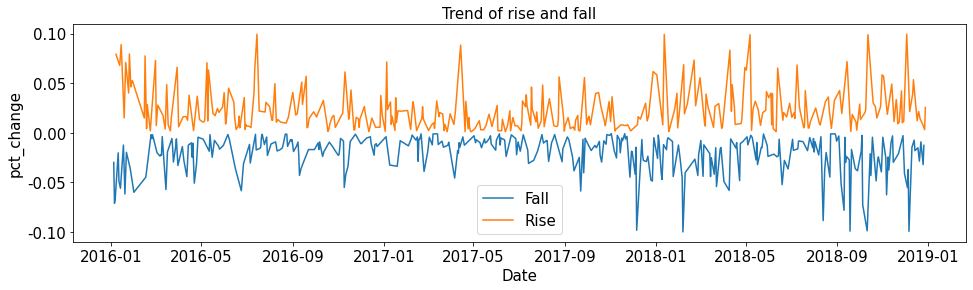

In [14]:
fig, ax = plt.subplots(figsize=(16,4))
down=stock[stock["漲跌"]<0].set_index("年月日")
up=stock[stock["漲跌"]>0].set_index('年月日')
sns.lineplot(x=down.index, y = '漲跌', data=down)
sns.lineplot(x=up.index, y = '漲跌', data=up)
ax.set_xlabel ('Date', fontsize=15)
ax.set_ylabel ('pct_change', fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Trend of rise and fall' , fontsize=15)
plt.legend(['Fall',"Rise"], fontsize=15,loc="best")

In [15]:
stock["year"]=stock["年月日"].apply(lambda x:x.year)

In [16]:
def judge(x):
    year = x["year"]
    if  x["漲跌"]>0 and x["漲跌"]>=np.percentile(stock[(stock["漲跌"]>0) & (stock["year"]==year)]["漲跌"],50):
        return "rise"
    elif x["漲跌"]<0 and x["漲跌"]<=np.percentile(stock[(stock["漲跌"]<0) & (stock["year"]==year)]["漲跌"],50):
        return "fall"
    else:
        return "same"

####漲跌幅度大於0.03    
####stock["看漲看跌"]=stock.apply(lambda x:judge(x),axis=1)

def judge2(x):
    if x>0 and x>=0.03:
        return "rise"
    elif x<0 and x<=-0.03:
        return "fall"
    else:
        return "same"
stock["看漲看跌"]=stock.apply(lambda x: judge(x),axis=1)

In [17]:
print(stock["看漲看跌"].value_counts())#/stock["看漲看跌"].value_counts().sum()

same    382
fall    178
rise    177
Name: 看漲看跌, dtype: int64


In [18]:
#stock

In [19]:
"""
Monday      predict Tuesday +1
Tuesday     predict Wednesday +1
Wednesday   predict Thursday +1
Thursday    predict Friday +1
Friday      predict Monday +3
Saturday    predict Monday +2
Sunday      predict Monday +1
"""
stock["年月日"]=stock["年月日"].apply(lambda x:x.date())

In [20]:
def tag(x):
    if x["weekday"] in ["Monday","Tuesday","Wednesday","Thursday","Sunday"]:
        date=x["post_time"].date()+timedelta(days=1)
    elif x["weekday"] == "Friday":
        date=x["post_time"].date()+timedelta(days=3)
    else:
        date=x["post_time"].date()+timedelta(days=2)
    
    return stock[stock["年月日"]==date]["看漲看跌"].values
def pre_date(x):
    if x["weekday"] in ["Monday","Tuesday","Wednesday","Thursday","Sunday"]:
        date=x["post_time"].date()+timedelta(days=1)
    elif x["weekday"] == "Friday":
        date=x["post_time"].date()+timedelta(days=3)
    else:
        date=x["post_time"].date()+timedelta(days=2)
    
    return date

final_data["tag"]=final_data.apply(lambda x:tag(x),axis=1)

In [21]:
final_data = final_data.loc[final_data["tag"].apply(lambda x:len(x))!=0]
final_data["tag"]=final_data["tag"].apply(lambda x:x[0])
final_data["pre_date"]= final_data.apply(lambda x:pre_date(x),axis=1)
final_data.head()

,post_time,title,content,weekday,tag,pre_date
8,2016-01-01 10:17:46,新聞大基金封關加碼億年台股漲像,原文連結必須檢附原文內容工商時報記者崔慈悌王姿琳台北報導年台股昨日封關四大基金在尾盤大舉加碼...,Friday,same,2016-01-04
152,2016-01-05 15:35:58,新聞大立光月合併營收億元,發文前請先詳閱新聞分類發文規範未依規範發文將受處份連結過長請善用縮網址連結能不能點擊者板規處...,Tuesday,fall,2016-01-06
168,2016-01-05 21:02:33,新聞罕見大立光去年月營收年減,原文連結必須檢附原文內容罕見大立光去年月營收年減中央社記者韓婷婷台北日電大立光電公布去年月合...,Tuesday,fall,2016-01-06
173,2016-01-05 22:05:22,新聞大立光業績免驚外資喊到元,原文連結必須檢附原文內容股王大立光今天公告月營收億元月減成創下年月以來單月最低紀錄顯示蘋果光...,Tuesday,fall,2016-01-06
174,2016-01-05 22:14:47,公告板開始舉辦樂透,大立光請到板按參與樂透一張幣迷你級樂透結束時間,Tuesday,fall,2016-01-06


In [22]:
#final_data[final_data["pre_date"]==pd.to_datetime("2016-07-05")]

In [23]:
final_data["tag"].value_counts()

same    6267
fall    3079
rise    2955
Name: tag, dtype: int64

In [24]:
final_data=final_data[final_data["tag"]!="same"]

In [25]:
def get_ngrams(n, data):
    tf = {}
    df = {}
    tfdf = {}
    for row in range(len(data)):
        tokens = [data.iloc[row][i:i+n] for i in range(0, len(data.iloc[row])-(n-1))]
        #if tokens not in stopword:
        for token in set(tokens):
            if token not in df.keys():
                df[token] = 1
            else:    
                df[token] += 1
        for token in tokens:
            if token not in tf.keys():
                tf[token] = 1
            else:
                tf[token] += 1
    for key, value in tf.items():
        tfdf[key] = [value, df[key]]
    final = pd.DataFrame.from_dict(tfdf, orient = 'index', columns = ['tf','df'])
    return final

In [26]:
def remove_same(df):
    """移除相同DF的 被較長詞包含的詞"""
    df['len'] = df.index.str.len()
    df.sort_values('len', ascending=True, inplace = True)
    df.drop('len', axis=1, inplace=True)
    same_drop = set()
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            # row i 的詞比row j 的詞短 (e.g. row i: 2-gram, row j: 3-gram)
            # 且row i 被 row j 的詞包含
            if (len(df.index[i]) < len(df.index[j])) & (df.index[i] in df.index[j]): 
                # 兩個詞的 DF 相差不到1% same DF number
                if abs(df.iloc[i, 1] - df.iloc[j, 1]) <= max(df.iloc[i, 1], df.iloc[j, 1]) * 0.01 :
                    #add the word in row i(shorter word) to a same_drop set
                    same_drop.add(df.index[i])
                    break
    return df.drop(same_drop)

In [27]:
def get_final_df(df, docs, all_df, all_docs,feature_count,usage):
    """combine the topic df and the total df and then calculate the chi square"""
    all_df.columns = ['all_tf','all_df','all_tf-idf']
    df = pd.merge(df, all_df, left_index = True, right_index = True, how = 'left')
    df['midf'] = np.log(df.df/(df.all_df*docs))
    df['tf_ev'] = (df.all_tf/all_docs)*docs
    df['df_ev'] = (df.all_df/all_docs)*docs
    df['tf_chi'] = ((df.tf-df.tf_ev)**2/df.tf_ev)*np.sign(df.tf-df.tf_ev)
    df['df_chi'] = ((df.df-df.df_ev)**2/df.df_ev)*np.sign(df.df-df.df_ev)
    df["lift"]=(df.df/docs)/(df.all_df/all_docs)
    df["mi*tfidf"]=df["midf"]*df["tfidf"]
   
    df = df.sort_values(usage,ascending = False)[:feature_count]
    return(df)

In [28]:
settings = {
    "metric": 'accuracy',
    "task": 'classification',
    "time_budget":100
}

In [29]:
import datetime
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return pd.to_datetime(datetime.date(year, month, day))

def get(x):
    #x=str(x)
   
    if stock[stock["年月日"]==x]["漲跌"].values[0]>0:
        return "漲"
    else:
        return "跌"

In [31]:
# for count in [500,1000,1500,2000,2500]
 #   for mode  in ["df_chi","tf_chi","midf","mi*tfidf","lift"]: 

all_data=[]
start = pd.to_datetime("2016-01-01")
end = pd.to_datetime("2018-09-01")   
end_tail = pd.to_datetime("2019-01-01")
train = final_data[(final_data["post_time"]>=start) & (final_data["post_time"]<end)]
test  = final_data[(final_data["post_time"]>=end) & (final_data["post_time"]<end_tail)]
test["all"]=test["title"]+test["content"]
train["all"]=train["title"]+train["content"]
rise=train[train["tag"]=="rise"]
fall=train[train["tag"]=="fall"]
train["newtag"]=train["tag"].apply(lambda x:-1 if x=="fall" else 1)
test["newtag"]=test["tag"].apply(lambda x:-1 if x=="fall" else 1)
data_2_gram=get_ngrams(2, train["all"])
data_3_gram=get_ngrams(3, train["all"])
fall_2_gram=get_ngrams(2, fall["all"])
fall_3_gram=get_ngrams(3, fall["all"])
rise_2_gram=get_ngrams(2, rise["all"])
rise_3_gram=get_ngrams(3, rise["all"])
data_all_gram=pd.concat([data_2_gram,data_3_gram],axis=0)
rise_all_gram=pd.concat([rise_2_gram,rise_3_gram],axis=0)
fall_all_gram=pd.concat([fall_2_gram,fall_3_gram],axis=0)
data_all_gram=data_all_gram[data_all_gram["tf"]>=40]
rise_all_gram=rise_all_gram[rise_all_gram["tf"]>=40]
fall_all_gram=fall_all_gram[fall_all_gram["tf"]>=40]
data_all_gram=remove_same(data_all_gram)
rise_all_gram=remove_same(rise_all_gram)
fall_all_gram=remove_same(fall_all_gram)
data_all_gram['tfidf'] = (1+np.log(data_all_gram.tf))*np.log( train.shape[0]/data_all_gram.df)
rise_all_gram['tfidf'] = (1+np.log(rise_all_gram.tf))*np.log( train["newtag"].value_counts().to_dict()[1]/rise_all_gram.df)
fall_all_gram['tfidf'] = (1+np.log(fall_all_gram.tf))*np.log( train["newtag"].value_counts().to_dict()[-1]/fall_all_gram.df)


print(train["post_time"].min(),train["post_time"].max(),test["post_time"].min(),test["post_time"].max())
print(train.shape,test.shape)
print(len(test.groupby("pre_date").size()))

2016-01-04 07:56:00 2018-08-27 19:32:00 2018-09-03 07:36:00 2018-12-27 22:05:20
(4637, 8) (1397, 8)
46


In [32]:
#from imblearn.over_sampling import SMOTE
#sm=SMOTE()

In [33]:
mode ="lift"
count =1500
  
            
fall=get_final_df(fall_all_gram,train["newtag"].value_counts().to_dict()[-1],data_all_gram,train.shape[0],count,mode)
rise=get_final_df(rise_all_gram,train["newtag"].value_counts().to_dict()[1],data_all_gram,train.shape[0],count,mode)
            
drop=set(fall.index).intersection(rise.index)
fall=fall.drop(list(drop))
rise=rise.drop(list(drop))
total=list(fall.index)+list(rise.index)
            
feature=np.zeros((train.shape[0],len(total)))

for k in range(len(train)):
    for l in range(len(total)):
        if total[l] in train["all"].iloc[k]:
            feature[k,l]+=1
        else:
            feature[k,l]=feature[k,l]

automl = AutoML()
automl.fit(X_train=feature, y_train=train["newtag"], **settings,verbose=1,estimator_list=["lrl1"],eval_method="cv")
        
pred = automl.predict_proba(feature)[:,1]
index = np.where(train["newtag"]==1)[0]
thres = np.median(pred[index])
        
print("threshold: %.2f" %(thres))
print('Best accuracy on validation data: {0:.4g}'.format(1 - automl.best_loss))

feature=np.zeros((test.shape[0],len(total)))

for k in range(len(test)):
    for l in range(len(total)):
        if total[l] in test["all"].iloc[k]:
            feature[k,l]+=1


y_pred = automl.predict_proba(feature)[:,1]
y_pred = np.where(y_pred>=thres,1,-1)
        
test["pred"]=y_pred
test=test.groupby("pre_date")["pred"].sum().reset_index(name="pred")
date_length=len(test)
      
test=test[test["pred"]!=0]
test["real"]= test["pre_date"].apply(lambda x:get(x))
test["pred"]=test["pred"].apply(lambda x:"漲"  if  x>0 else "跌")
shot=len(test)
            
print("模型已預測%d個交易日" % (date_length))
print("出手率: %.2f" % (shot/date_length))   
print('%.2f%% 的交易日的漲跌已經被成功預測 ' % (100*accuracy_score(test["real"],test["pred"])))

[flaml.automl: 09-25 09:20:30] {1289} INFO - Evaluation method: cv
[flaml.automl: 09-25 09:20:30] {1318} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 09-25 09:20:30] {1344} INFO - List of ML learners in AutoML Run: ['lrl1']
[flaml.automl: 09-25 09:20:30] {1537} INFO - iteration 0, current learner lrl1
No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'.
[flaml.automl: 09-25 09:22:04] {1696} INFO -  at 93.5s,	best lrl1's error=0.3127,	best lrl1's error=0.3127
[flaml.automl: 09-25 09:22:04] {1778} INFO - selected model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-25 09:22:28] {1828} INFO - retrain lrl1 for 24.0s
[flaml.automl: 09-25 09:22:28] {1831} INFO - retrained model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-25 09:22:28] {1369} INFO - fit succeeded
[flaml.automl: 09-25 09:22:28] {1370} IN

threshold: 0.87
Best accuracy on validation data: 0.6873
模型已預測46個交易日
出手率: 0.96
65.91% 的交易日的漲跌已經被成功預測 
